# 1 Визуальный анализ данных #

***Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)***

***Сохраните результат. Загрузите на сайт и отчитайтесь по заданию***

In [60]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

В данном датасете целевым является признак count - количество арендованных велосипедов

In [61]:
## загрузите с помощью pandas файл train.csv из предложенного датасета
df = pd.read_csv('train.csv')

## выведите первые пять строчек
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [62]:
# выведите информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Первый столбец в датасете datatime содержит дату и время. В таблице будет несколько строк соответствующих одному и тому же дню, но с разным временем.

Нужно сделать таким образом, чтобы для каждого дня была одна строка, время можно удалить. Продумайте что нужно сделать с остальными полями:
- season        
- holiday       
- workingday    
- weather       
- temp          
- atemp         
- humidity      
- windspeed     
- casual        
- registered    
- count         

In [63]:
# оставляем только день в столбце datetime
df['datetime'] = pd.to_datetime(df['datetime']).dt.date

df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [64]:
df['weather'].unique()

array([1, 2, 3, 4], dtype=int64)

In [65]:
# группируем по каждому дню, оставляя среднее значение во всех столбцах
# reset_index для того, чтобы колонка datetime вошла как полноценный столбец датасета
df_group = df.groupby('datetime').agg(season=('season', 'mean'),
                                      holiday=('holiday', 'mean'),
                                      workingday=('workingday', 'mean'),
                                      weather=('weather', 'mean'),
                                      temp=('temp', 'mean'),
                                      atemp=('atemp', 'mean'),
                                      humidity=('humidity', 'mean'),
                                      windspeed=('windspeed', 'mean'),
                                      casual=('casual', 'sum'),
                                      registered=('registered', 'sum'),
                                      count=('count', 'sum')).reset_index()

df_group.head(5)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1.0,0.0,0.0,1.583333,14.110833,18.181250,80.583333,10.749871,331,654,985
1,2011-01-02,1.0,0.0,0.0,1.956522,14.902609,17.686957,69.608696,16.652122,131,670,801
2,2011-01-03,1.0,0.0,1.0,1.000000,8.050909,9.470227,43.727273,16.636709,120,1229,1349
3,2011-01-04,1.0,0.0,1.0,1.043478,8.200000,10.606087,59.043478,10.739809,108,1454,1562
4,2011-01-05,1.0,0.0,1.0,1.000000,9.305217,11.463478,43.695652,12.522300,82,1518,1600


In [66]:
df_group['weather'].unique()


array([1.58333333, 1.95652174, 1.        , 1.04347826, 1.34782609,
       1.69565217, 1.70833333, 1.33333333, 2.18181818, 1.09090909,
       1.08333333, 1.08695652, 1.5       , 1.20833333, 2.16666667,
       2.        , 1.65217391, 2.2173913 , 1.91666667, 1.86956522,
       2.375     , 1.45833333, 1.25      , 1.39130435, 1.43478261,
       1.13043478, 1.04166667, 2.39130435, 1.17391304, 1.875     ,
       2.90909091, 1.60869565, 2.04347826, 1.16666667, 1.66666667,
       1.41666667, 2.45833333, 2.08333333, 1.625     , 1.52173913,
       2.20833333, 2.5       , 1.29166667, 1.54166667, 1.95833333,
       1.125     , 1.79166667, 1.375     , 1.75      , 2.33333333,
       2.04166667, 2.65217391, 2.75      , 2.125     , 2.625     ,
       1.83333333, 2.70833333, 2.54166667, 2.79166667, 1.91304348,
       1.26086957, 2.25      , 2.29166667, 2.41666667, 2.58333333,
       1.30434783])

In [67]:
# вывод конца датасета, чтобы увидеть последнюю дату 
df_group.tail(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
451,2012-12-15,4.0,0.0,0.0,1.375000,13.290833,16.919167,65.041667,7.125450,767,4280,5047
452,2012-12-16,4.0,0.0,0.0,2.041667,14.862500,18.496875,83.875000,6.749692,538,3248,3786
453,2012-12-17,4.0,0.0,1.0,2.125000,16.126667,20.075000,90.708333,6.583308,212,4373,4585
454,2012-12-18,4.0,0.0,1.0,1.208333,16.844167,20.485417,66.625000,14.834079,433,5124,5557
455,2012-12-19,4.0,0.0,1.0,1.000000,13.632500,17.108125,62.541667,12.334142,333,4934,5267


Преобразуйте датасет еще немного:

из столбца datatime сделайте два столбца: month year

In [68]:
# выделяем год
df_group['year'] = pd.to_datetime(df_group['datetime']).dt.year

# выделяем месяц
df_group['month'] = pd.to_datetime(df_group['datetime']).dt.month

df_group.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month
0,2011-01-01,1.0,0.0,0.0,1.583333,14.110833,18.181250,80.583333,10.749871,331,654,985,2011,1
1,2011-01-02,1.0,0.0,0.0,1.956522,14.902609,17.686957,69.608696,16.652122,131,670,801,2011,1
2,2011-01-03,1.0,0.0,1.0,1.000000,8.050909,9.470227,43.727273,16.636709,120,1229,1349,2011,1
3,2011-01-04,1.0,0.0,1.0,1.043478,8.200000,10.606087,59.043478,10.739809,108,1454,1562,2011,1
4,2011-01-05,1.0,0.0,1.0,1.000000,9.305217,11.463478,43.695652,12.522300,82,1518,1600,2011,1


In [69]:
# перевод в столбцов в целочисленный тип
df_group = df_group.astype({'season' : int, 'holiday' : int, 'workingday' : int})
df_group['weather'] = round(df_group['weather'])
df_group.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month
0,2011-01-01,1,0,0,2.0,14.110833,18.181250,80.583333,10.749871,331,654,985,2011,1
1,2011-01-02,1,0,0,2.0,14.902609,17.686957,69.608696,16.652122,131,670,801,2011,1
2,2011-01-03,1,0,1,1.0,8.050909,9.470227,43.727273,16.636709,120,1229,1349,2011,1
3,2011-01-04,1,0,1,1.0,8.200000,10.606087,59.043478,10.739809,108,1454,1562,2011,1
4,2011-01-05,1,0,1,1.0,9.305217,11.463478,43.695652,12.522300,82,1518,1600,2011,1


<AxesSubplot:xlabel='registered', ylabel='count'>

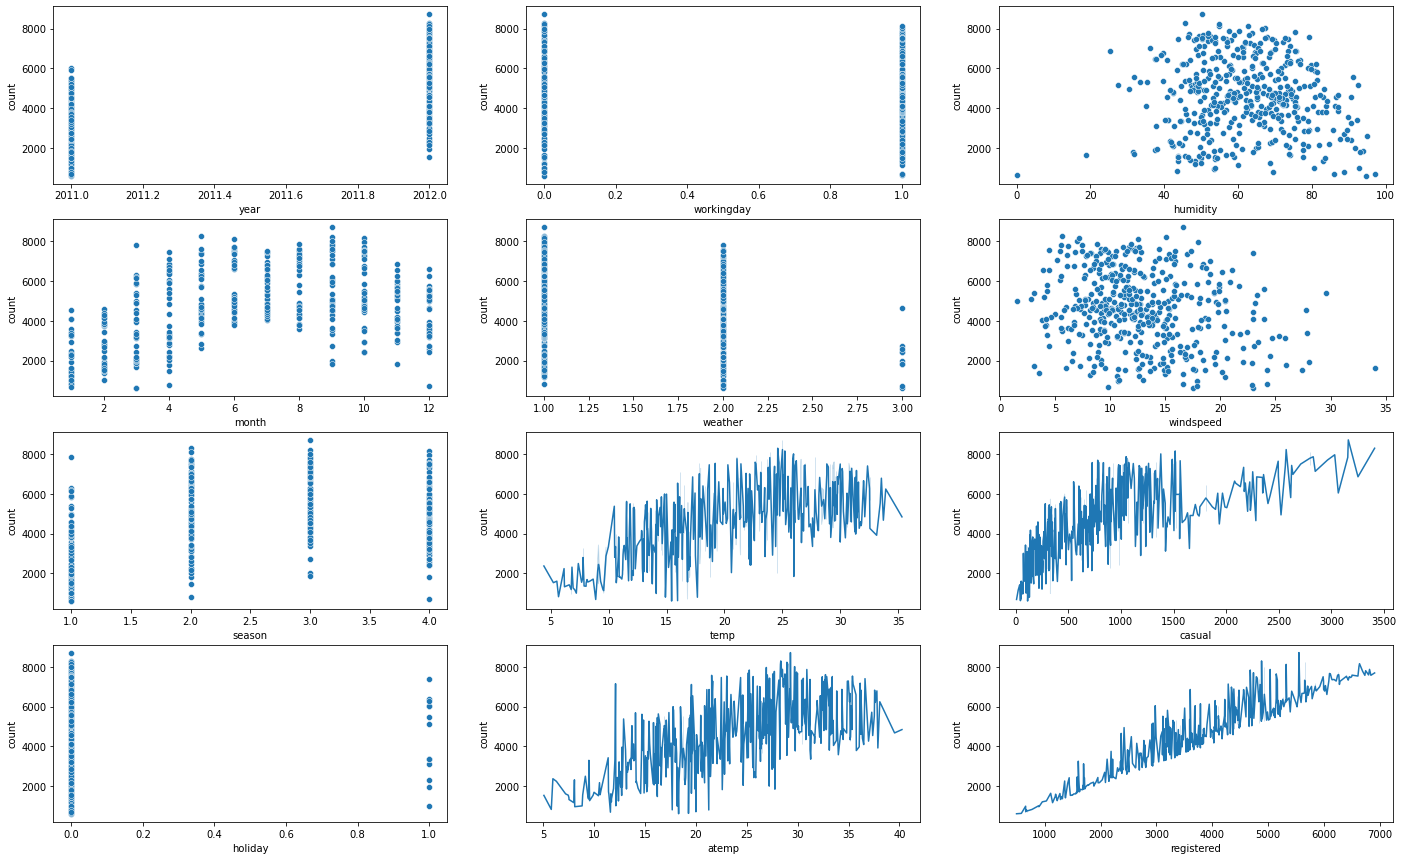

In [70]:
# Постройте графики зависимостей целевого признака count
# от каждого из нецелевых
# Должно получиться 12 графиков, используйте subplot
#

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(24, 15))

sns.scatterplot(ax=axs[0, 0], x=df_group['year'], y=df_group['count'])
sns.scatterplot(ax=axs[1, 0], x=df_group['month'], y=df_group['count'])
sns.scatterplot(ax=axs[2, 0], x=df_group['season'], y=df_group['count'])
sns.scatterplot(ax=axs[3, 0], x=df_group['holiday'], y=df_group['count'])
sns.scatterplot(ax=axs[0, 1], x=df_group['workingday'], y=df_group['count'])
sns.scatterplot(ax=axs[1, 1], x=df_group['weather'], y=df_group['count'])
sns.lineplot(ax=axs[2, 1], x=df_group['temp'], y=df_group['count'])
sns.lineplot(ax=axs[3, 1], x=df_group['atemp'], y=df_group['count'])
sns.scatterplot(ax=axs[0, 2], x=df_group['humidity'], y=df_group['count'])
sns.scatterplot(ax=axs[1, 2], x=df_group['windspeed'], y=df_group['count'])
sns.lineplot(ax=axs[2, 2], x=df_group['casual'], y=df_group['count'])
sns.lineplot(ax=axs[3, 2], x=df_group['registered'], y=df_group['count'])


**1. Ответьте на вопросы:**

Каков характер зависимости числа прокатов от месяца?

Укажите один или два признака, от которых число прокатов скорее всего зависит линейно


In [71]:
# ответ 1
# Нелинейная зависимость.

# ответ 2
# Число прокатов зависит линейно от casual, registered.

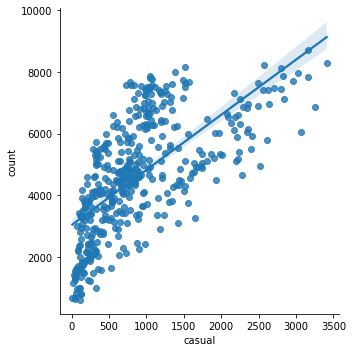

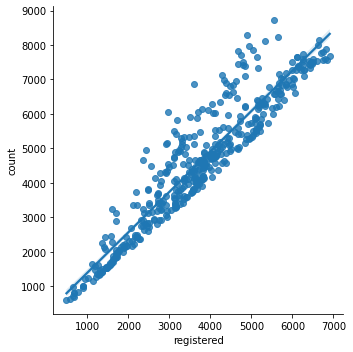

In [72]:
# Проверьте ответы на предыдущие вопросы с помощью lmplot

sns.lmplot(x='casual', y='count', data=df_group)
sns.lmplot(x='registered', y='count', data=df_group) # точно линейная зависимость


**2. Корреляционная матрица**

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная величина корреляции, тем взаимосвязь больше.


                  season   holiday  workingday   weather      temp     atemp  \
season      1.000000e+00  0.029465   -0.010530  0.049922  0.279693  0.286781   
holiday     2.946534e-02  1.000000   -0.250880 -0.025987  0.000664 -0.005230   
workingday -1.052982e-02 -0.250880    1.000000  0.046901  0.028408  0.022898   
weather     4.992174e-02 -0.025987    0.046901  1.000000 -0.059307 -0.055238   
temp        2.796929e-01  0.000664    0.028408 -0.059307  1.000000  0.988777   
atemp       2.867814e-01 -0.005230    0.022898 -0.055238  0.988777  1.000000   
humidity    2.572987e-01  0.001652   -0.014252  0.567644  0.146933  0.165025   
windspeed  -2.331441e-01  0.014136    0.020647 -0.011776 -0.163716 -0.190875   
casual      1.722957e-01  0.075342   -0.548681 -0.220351  0.547570  0.548204   
registered  4.101632e-01 -0.049767    0.282694 -0.235474  0.507543  0.510084   
count       3.924566e-01 -0.011622    0.020870 -0.270726  0.610687  0.612956   
year       -8.900277e-14  0.013177   -0.

<AxesSubplot:>

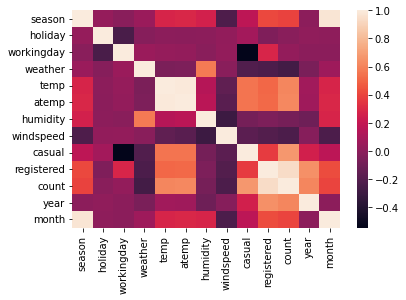

In [73]:
#Постройте heatmap корреляционной матрицы. 
#Матрица формируется средствами pandas, 
#со стандартным значением параметров.
#
#

corr_matrix = df_group.corr()
print(corr_matrix)
sns.heatmap(corr_matrix)

`Ответьте на вопросы:` с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). 

А с какими больше всего?

In [74]:
# ответ
# Меньше всего коррелирует с holiday, workingday, humidity.

In [75]:
# ответ
# Больше всего коррелирует с registered, windspeed, weather.

**3. Barplot**

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

<AxesSubplot:>

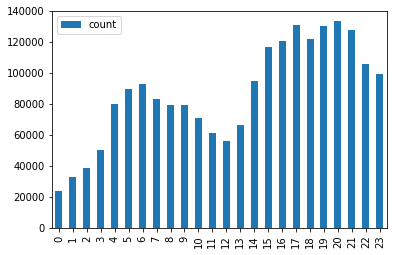

In [76]:
# напишите код для посторения bar графика
#

dt = df_group.groupby(['year', 'month'])['count'].sum().reset_index()
dt.plot(y='count', kind='bar')

`Ответьте на вопрос:` почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

In [77]:
# Возможно, в 2012 прокат стал популярнее.

**4. Countplot**

Постройте countplot диаграммы для признаков `holiday`, `workingday`, `weather`

<AxesSubplot:xlabel='holiday', ylabel='count'>

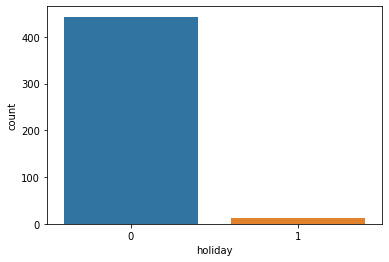

In [78]:
# напишите код для посторения Countplot графиков
#
#

sns.countplot(x='holiday', data=df_group)


<AxesSubplot:xlabel='workingday', ylabel='count'>

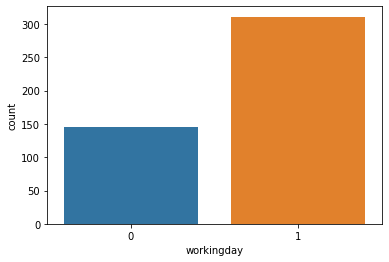

In [79]:
sns.countplot(x='workingday', data=df_group)


<AxesSubplot:xlabel='weather', ylabel='count'>

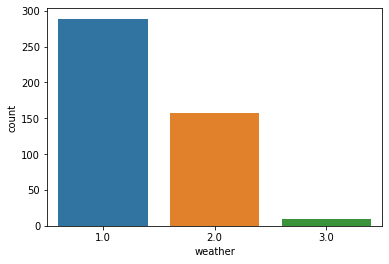

In [80]:
sns.countplot(x='weather', data=df_group)


`Ответьте на вопрос:` какие можно сделать выводы их этих графиков.

In [81]:
# Больше всего прокатов было в будни, непраздничные дни при ясной или облачной погоде.

**5. Распределение**

Постройте распределение целевого признака.

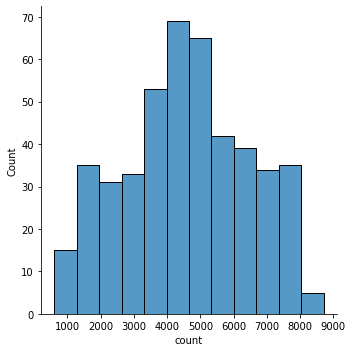

In [82]:
# код

sns.displot(x='count', data=df_group)